In [2]:
import shutil, os, pathlib
for p in [pathlib.Path.home()/".nv/ComputeCache",
          pathlib.Path.home()/".cache/jax",
          pathlib.Path.home()/".cache/xla"]:
    shutil.rmtree(p, ignore_errors=True)
print("caches cleared; restart kernel and re-run the first cell.")

caches cleared; restart kernel and re-run the first cell.


In [3]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"
os.environ.setdefault("JAX_PLATFORMS", "cuda")
os.environ.setdefault("JAX_ENABLE_X80", "True")
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "True"
#os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "0.65" 

import jax, jax.numpy as jnp

In [4]:
import os, sys
os.chdir("/home/agnes/Skyclean")       # repo root
sys.path.insert(0, os.getcwd())

from skyclean.silc.ilc import ProduceSILC
from skyclean.silc.ilc import SILCTools
from skyclean.silc.file_templates import FileTemplates
from skyclean.silc.pipeline import Pipeline
from skyclean.silc.power_spec import MapAlmConverter, PowerSpectrumTT
from skyclean.silc.map_tools import SamplingConverters, MWTools  
from skyclean.silc.download import DownloadData
from skyclean.silc.harmonic_response import HRFigures, HarmonicWindows, AxisymmetricGenerators, SimpleHarmonicWindows

In [5]:
directory = "/Scratch/agnes/data" 
ft = FileTemplates(directory).file_templates

# INPUT wavelet coeff template (uses {comp}, {frequency}, {scale}, {realisation:05d}, {lmax}, {lam})
file_template = ft.get("wavelet_coeffs") or ft["wavelet_c_j"]

# OUTPUT templates expected by ILC_wav_coeff_maps_MP (use {component}, {extract_comp}, {realisation})
output_templates = {
    "doubled_maps":           ft["doubled_maps"],
    "covariance_matrices":    ft["covariance_matrices"],
    "weight_vector_matrices": ft["weight_vector_matrices"],
    "ilc_maps":               ft["ilc_maps"],
    "trimmed_maps":           ft["trimmed_maps"],
    "ilc_synth":              ft["ilc_synth"],
    "ilc_spectrum":           ft.get("ilc_spectrum"),  
    "scaling_coeffs":         ft["scaling_coeffs"], 
    "f_scal":                 ft["f_scal"],
}

In [6]:
if __name__ == "__main__":                    
    import multiprocessing as mp
    mp.set_start_method("spawn", force=True) 

In [7]:
pipe = Pipeline( 
    components=['cmb', 'tsz', 'sync', 'dust', 'noise'], 
    wavelet_components=["cfn"], 
    ilc_components=['cmb'], 
    frequencies=["030","044","070","100","143","217","353","545","857"], 
    realisations=1, 
    start_realisation=0, 
    lmax=1024, 
    N_directions=1, 
    lam=2.0, 
    method="jax_cuda", 
    visualise=True, 
    save_ilc_intermediates=True,
    overwrite=True, 
    directory="/Scratch/agnes/data", 
    constraint=False,
    nsamp=1200,
    )

scal -> ell_min =    0, ell_peak =   64, ell_max =   64
j =  0  ->  ell_min =   32, ell_max =  128
j =  1  ->  ell_min =   64, ell_max =  256
j =  2  ->  ell_min =  128, ell_max =  512
j =  3  ->  ell_min =  256, ell_max =  705
j =  4  ->  ell_min =  542, ell_max =  916
j =  5  ->  ell_min =  705, ell_max = 1192
j =  6  ->  ell_min =  916, ell_max = 1549
j =  7  ->  ell_min = 1192, ell_max = 2015
j =  8  ->  ell_min = 1550, ell_max = 2539
j =  9  ->  ell_min = 2115, ell_max = 3047
j = 10  ->  ell_min = 2539, ell_max = 3656
j = 11  ->  ell_min = 3046, ell_max = 4253


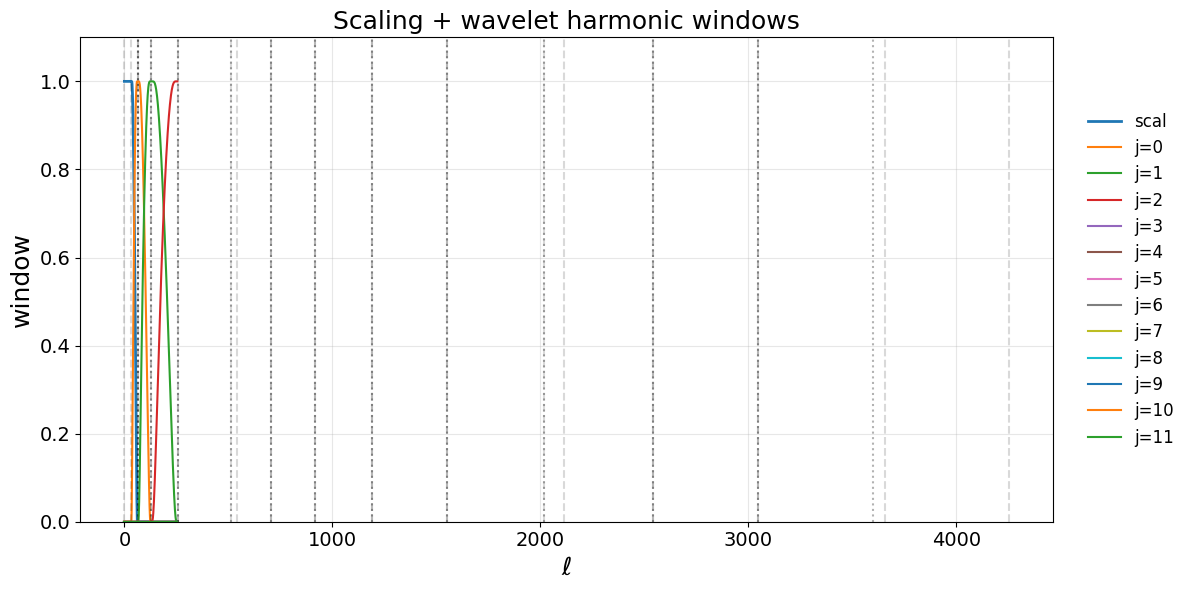

In [7]:
import numpy as np

ELL_PEAK = np.array([64, 128, 256, 512, 705, 917, 1192, 1550, 2015, 2539, 3047, 3600], dtype=int)

lam_list = [2.0,  2.0,  2.0, 1.377,
            1.3,  1.3,  1.3, 1.3,
            1.26005, 1.2001, 1.2, 1.1815]

L = 256 

hw = SimpleHarmonicWindows(
    L=L,
    ell_peaks=ELL_PEAK,
    lam_list=lam_list,
    scal_ell_cut=64.0,
)

hw.plot_scaling_and_wavelets(truncate=True)
# hw.plot_scaling_and_wavelets(truncate=False)  # optional


scal -> ell_min =    0, ell_peak =   64, ell_max =   64
j =  0  ->  ell_min =   32, ell_max =  128
j =  1  ->  ell_min =   64, ell_max =  256
j =  2  ->  ell_min =  128, ell_max =  512
j =  3  ->  ell_min =  256, ell_max =  705
j =  4  ->  ell_min =  542, ell_max =  916
j =  5  ->  ell_min =  705, ell_max = 1192
j =  6  ->  ell_min =  916, ell_max = 1549
j =  7  ->  ell_min = 1192, ell_max = 2015
j =  8  ->  ell_min = 1550, ell_max = 2539
j =  9  ->  ell_min = 2115, ell_max = 3047
j = 10  ->  ell_min = 2539, ell_max = 3656
j = 11  ->  ell_min = 3046, ell_max = 4253


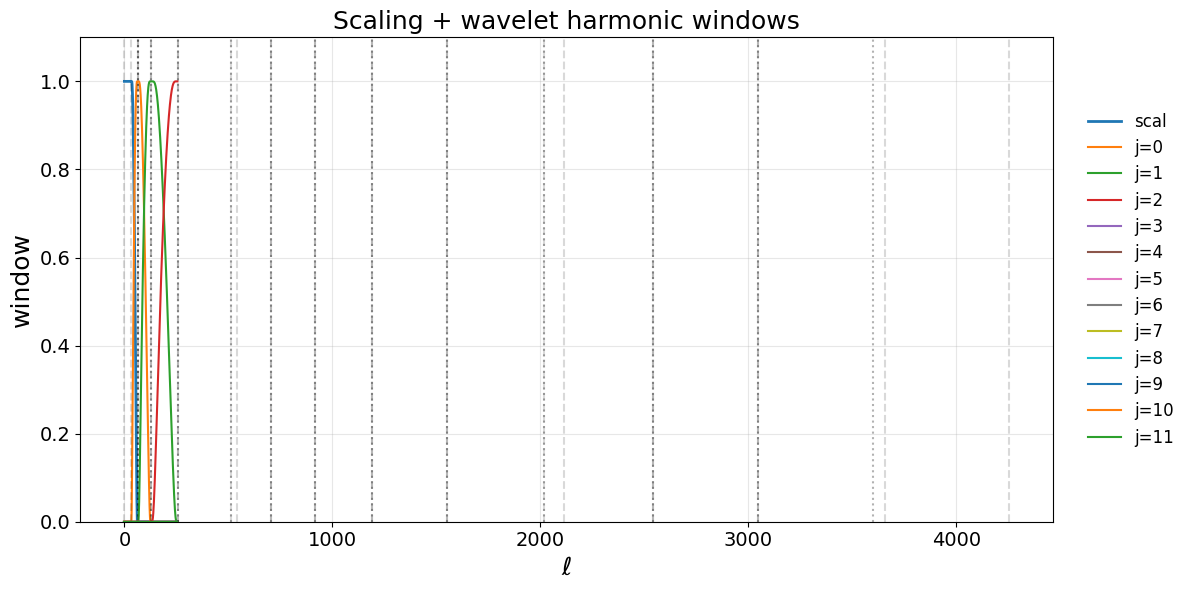

In [8]:
import numpy as np

ELL_PEAK = np.array([64, 128, 256, 512, 705, 917, 1192, 1550, 2015, 2539, 3047, 3600], dtype=int)

lam_list = [2.0,  2.0,  2.0, 1.377,
            1.3,  1.3,  1.3, 1.3,
            1.26005, 1.2001, 1.2, 1.1815]

L = 256  

hw = SimpleHarmonicWindows(
    L=L,
    ell_peaks=ELL_PEAK,
    lam_list=lam_list,
    scal_ell_cut=64.0,
)

hw.plot_scaling_and_wavelets(truncate=False)
# hw.plot_scaling_and_wavelets(truncate=False)  # optional


In [9]:
pipe.step_download()

--- STARTING DATA DOWNLOAD ---
Device 0: bytes_in_use=0 peak_bytes_in_use=0 bytes_limit=19069206528 largest_free_chunk=n/a num_allocs=0
File /Scratch/agnes/data/CMB_realisations/tsz_f030.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/tsz_f044.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/tsz_f070.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/tsz_f100.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/tsz_f143.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/tsz_f217.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/tsz_f353.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/tsz_f545.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/tsz_f857.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/syn

In [10]:
pipe.step_process()

--- PROCESSING CFNs AND TOTAL MAP CFN ---
Device 0: bytes_in_use=0 peak_bytes_in_use=0 bytes_limit=19069206528 largest_free_chunk=n/a num_allocs=0


setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


CFN map at 030 GHz for realisation 0 saved to /Scratch/agnes/data/CFN_realisations/cfn_f030_r0000_lmax1024.npy


setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


CFN map at 044 GHz for realisation 0 saved to /Scratch/agnes/data/CFN_realisations/cfn_f044_r0000_lmax1024.npy


setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


CFN map at 070 GHz for realisation 0 saved to /Scratch/agnes/data/CFN_realisations/cfn_f070_r0000_lmax1024.npy


setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


CFN map at 100 GHz for realisation 0 saved to /Scratch/agnes/data/CFN_realisations/cfn_f100_r0000_lmax1024.npy


setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


CFN map at 143 GHz for realisation 0 saved to /Scratch/agnes/data/CFN_realisations/cfn_f143_r0000_lmax1024.npy


setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


CFN map at 217 GHz for realisation 0 saved to /Scratch/agnes/data/CFN_realisations/cfn_f217_r0000_lmax1024.npy


setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


CFN map at 353 GHz for realisation 0 saved to /Scratch/agnes/data/CFN_realisations/cfn_f353_r0000_lmax1024.npy


setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


CFN map at 545 GHz for realisation 0 saved to /Scratch/agnes/data/CFN_realisations/cfn_f545_r0000_lmax1024.npy


setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


CFN map at 857 GHz for realisation 0 saved to /Scratch/agnes/data/CFN_realisations/cfn_f857_r0000_lmax1024.npy


--- PRODUCING WAVELET TRANSFORMS ---
Device 0: bytes_in_use=0 peak_bytes_in_use=0 bytes_limit=19069206528 largest_free_chunk=n/a num_allocs=0


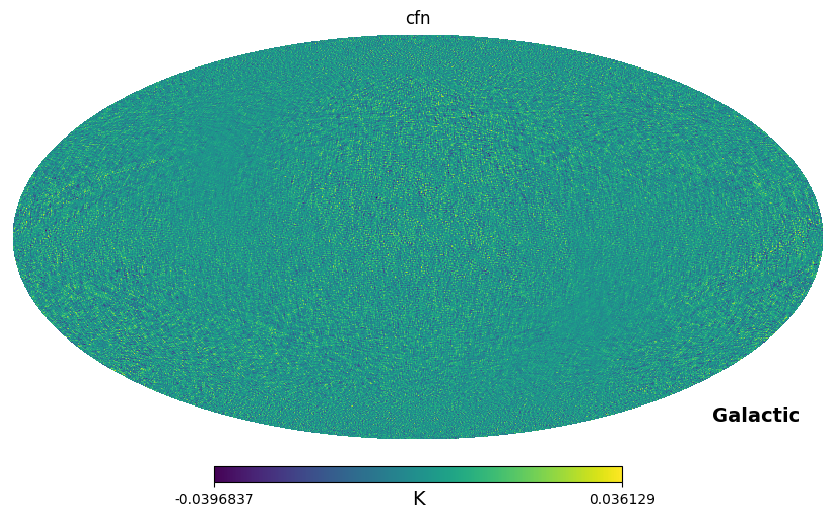

max |kappa_jl[j>=3, ell<=255]| = 0.0

=== Eq.(30) check (should be ~1) ===
ell=   0  value=1.000000e+00
ell=   1  value=1.000000e+00
ell=   2  value=1.000000e+00
ell=   5  value=1.000000e+00
ell=  10  value=1.000000e+00
ell=  20  value=1.000000e+00
ell=  32  value=1.000000e+00
ell=  64  value=1.000000e+00
ell= 128  value=1.000000e+00
ell= 256  value=1.000000e+00
ell=1024  value=1.000000e+00
min/max over ell with denom>0: 0.9999999999999994 1.0000000000000004


[DEBUG analysis] L = 1025 N = 1 lam_safe = 2.0
[DEBUG analysis] wav_jln shape: (12, 1025, 2049) dtype: complex128
[DEBUG analysis] scal_l shape: (1025,) dtype: complex128
[DEBUG analysis] S(ell)=|phi|^2+sum|psi|^2  min/max: 0.07957747154594766 25.950888160393756
[DEBUG analysis]   min at ell = 0
[DEBUG analysis]   max at ell = 1024
[DEBUG analysis] S tail (last 20 ells): [25.46961254 25.49494283 25.52027313 25.54560343 25.57093372 25.59626402
 25.62159431 25.64692461 25.67225491 25.6975852  25.7229155  25.74824579
 25.77357609 25

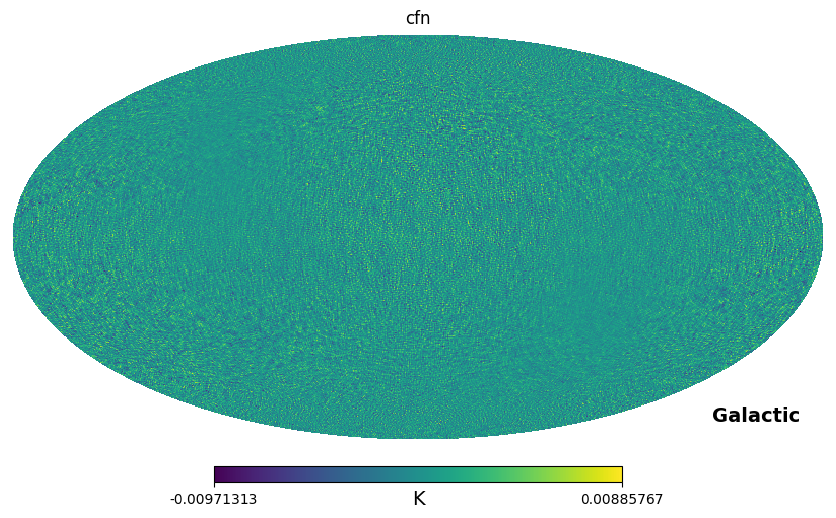

max |kappa_jl[j>=3, ell<=255]| = 0.0

=== Eq.(30) check (should be ~1) ===
ell=   0  value=1.000000e+00
ell=   1  value=1.000000e+00
ell=   2  value=1.000000e+00
ell=   5  value=1.000000e+00
ell=  10  value=1.000000e+00
ell=  20  value=1.000000e+00
ell=  32  value=1.000000e+00
ell=  64  value=1.000000e+00
ell= 128  value=1.000000e+00
ell= 256  value=1.000000e+00
ell=1024  value=1.000000e+00
min/max over ell with denom>0: 0.9999999999999994 1.0000000000000004


[DEBUG analysis] L = 1025 N = 1 lam_safe = 2.0
[DEBUG analysis] wav_jln shape: (12, 1025, 2049) dtype: complex128
[DEBUG analysis] scal_l shape: (1025,) dtype: complex128
[DEBUG analysis] S(ell)=|phi|^2+sum|psi|^2  min/max: 0.07957747154594766 25.950888160393756
[DEBUG analysis]   min at ell = 0
[DEBUG analysis]   max at ell = 1024
[DEBUG analysis] S tail (last 20 ells): [25.46961254 25.49494283 25.52027313 25.54560343 25.57093372 25.59626402
 25.62159431 25.64692461 25.67225491 25.6975852  25.7229155  25.74824579
 25.77357609 25

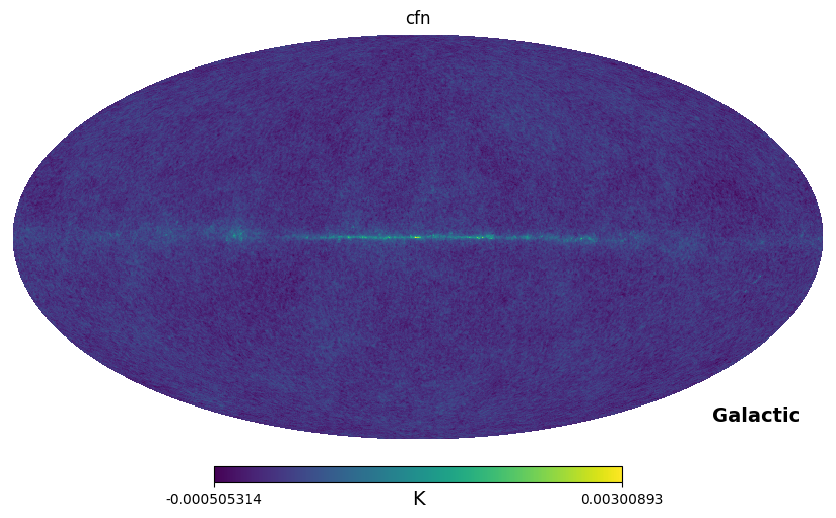

max |kappa_jl[j>=3, ell<=255]| = 0.0

=== Eq.(30) check (should be ~1) ===
ell=   0  value=1.000000e+00
ell=   1  value=1.000000e+00
ell=   2  value=1.000000e+00
ell=   5  value=1.000000e+00
ell=  10  value=1.000000e+00
ell=  20  value=1.000000e+00
ell=  32  value=1.000000e+00
ell=  64  value=1.000000e+00
ell= 128  value=1.000000e+00
ell= 256  value=1.000000e+00
ell=1024  value=1.000000e+00
min/max over ell with denom>0: 0.9999999999999994 1.0000000000000004


[DEBUG analysis] L = 1025 N = 1 lam_safe = 2.0
[DEBUG analysis] wav_jln shape: (12, 1025, 2049) dtype: complex128
[DEBUG analysis] scal_l shape: (1025,) dtype: complex128
[DEBUG analysis] S(ell)=|phi|^2+sum|psi|^2  min/max: 0.07957747154594766 25.950888160393756
[DEBUG analysis]   min at ell = 0
[DEBUG analysis]   max at ell = 1024
[DEBUG analysis] S tail (last 20 ells): [25.46961254 25.49494283 25.52027313 25.54560343 25.57093372 25.59626402
 25.62159431 25.64692461 25.67225491 25.6975852  25.7229155  25.74824579
 25.77357609 25

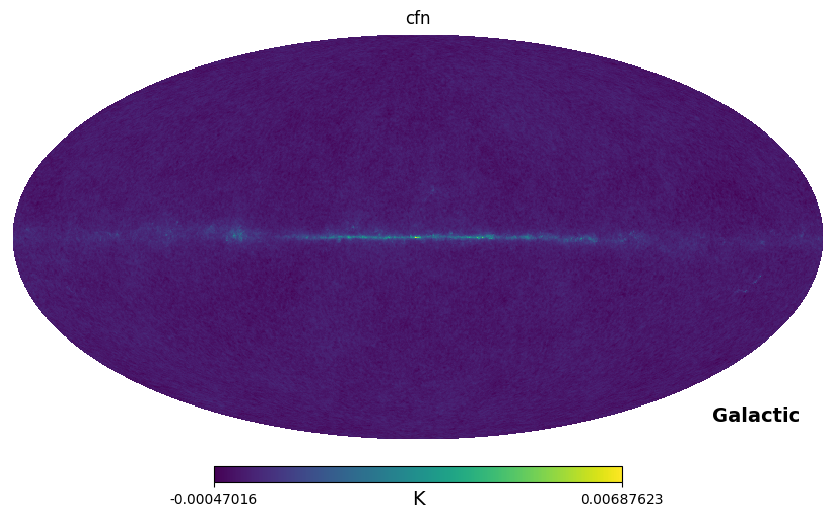

max |kappa_jl[j>=3, ell<=255]| = 0.0

=== Eq.(30) check (should be ~1) ===
ell=   0  value=1.000000e+00
ell=   1  value=1.000000e+00
ell=   2  value=1.000000e+00
ell=   5  value=1.000000e+00
ell=  10  value=1.000000e+00
ell=  20  value=1.000000e+00
ell=  32  value=1.000000e+00
ell=  64  value=1.000000e+00
ell= 128  value=1.000000e+00
ell= 256  value=1.000000e+00
ell=1024  value=1.000000e+00
min/max over ell with denom>0: 0.9999999999999994 1.0000000000000004


[DEBUG analysis] L = 1025 N = 1 lam_safe = 2.0
[DEBUG analysis] wav_jln shape: (12, 1025, 2049) dtype: complex128
[DEBUG analysis] scal_l shape: (1025,) dtype: complex128
[DEBUG analysis] S(ell)=|phi|^2+sum|psi|^2  min/max: 0.07957747154594766 25.950888160393756
[DEBUG analysis]   min at ell = 0
[DEBUG analysis]   max at ell = 1024
[DEBUG analysis] S tail (last 20 ells): [25.46961254 25.49494283 25.52027313 25.54560343 25.57093372 25.59626402
 25.62159431 25.64692461 25.67225491 25.6975852  25.7229155  25.74824579
 25.77357609 25

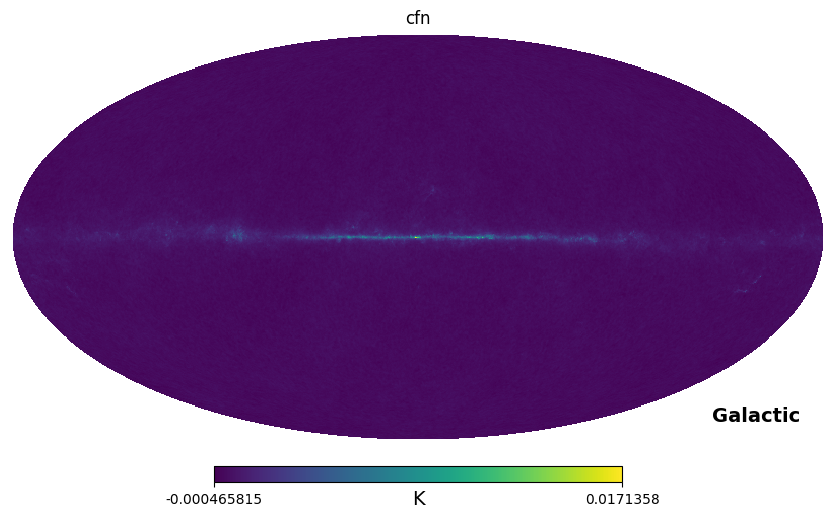

max |kappa_jl[j>=3, ell<=255]| = 0.0

=== Eq.(30) check (should be ~1) ===
ell=   0  value=1.000000e+00
ell=   1  value=1.000000e+00
ell=   2  value=1.000000e+00
ell=   5  value=1.000000e+00
ell=  10  value=1.000000e+00
ell=  20  value=1.000000e+00
ell=  32  value=1.000000e+00
ell=  64  value=1.000000e+00
ell= 128  value=1.000000e+00
ell= 256  value=1.000000e+00
ell=1024  value=1.000000e+00
min/max over ell with denom>0: 0.9999999999999994 1.0000000000000004


[DEBUG analysis] L = 1025 N = 1 lam_safe = 2.0
[DEBUG analysis] wav_jln shape: (12, 1025, 2049) dtype: complex128
[DEBUG analysis] scal_l shape: (1025,) dtype: complex128
[DEBUG analysis] S(ell)=|phi|^2+sum|psi|^2  min/max: 0.07957747154594766 25.950888160393756
[DEBUG analysis]   min at ell = 0
[DEBUG analysis]   max at ell = 1024
[DEBUG analysis] S tail (last 20 ells): [25.46961254 25.49494283 25.52027313 25.54560343 25.57093372 25.59626402
 25.62159431 25.64692461 25.67225491 25.6975852  25.7229155  25.74824579
 25.77357609 25

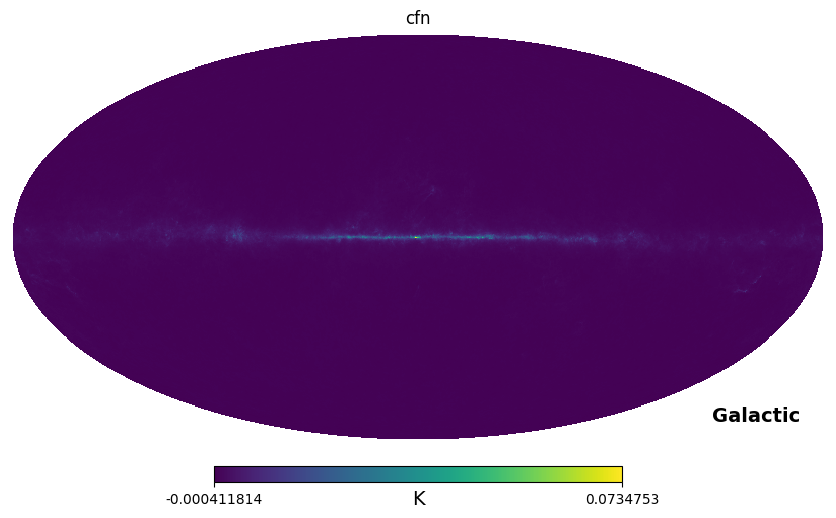

max |kappa_jl[j>=3, ell<=255]| = 0.0

=== Eq.(30) check (should be ~1) ===
ell=   0  value=1.000000e+00
ell=   1  value=1.000000e+00
ell=   2  value=1.000000e+00
ell=   5  value=1.000000e+00
ell=  10  value=1.000000e+00
ell=  20  value=1.000000e+00
ell=  32  value=1.000000e+00
ell=  64  value=1.000000e+00
ell= 128  value=1.000000e+00
ell= 256  value=1.000000e+00
ell=1024  value=1.000000e+00
min/max over ell with denom>0: 0.9999999999999994 1.0000000000000004


[DEBUG analysis] L = 1025 N = 1 lam_safe = 2.0
[DEBUG analysis] wav_jln shape: (12, 1025, 2049) dtype: complex128
[DEBUG analysis] scal_l shape: (1025,) dtype: complex128
[DEBUG analysis] S(ell)=|phi|^2+sum|psi|^2  min/max: 0.07957747154594766 25.950888160393756
[DEBUG analysis]   min at ell = 0
[DEBUG analysis]   max at ell = 1024
[DEBUG analysis] S tail (last 20 ells): [25.46961254 25.49494283 25.52027313 25.54560343 25.57093372 25.59626402
 25.62159431 25.64692461 25.67225491 25.6975852  25.7229155  25.74824579
 25.77357609 25

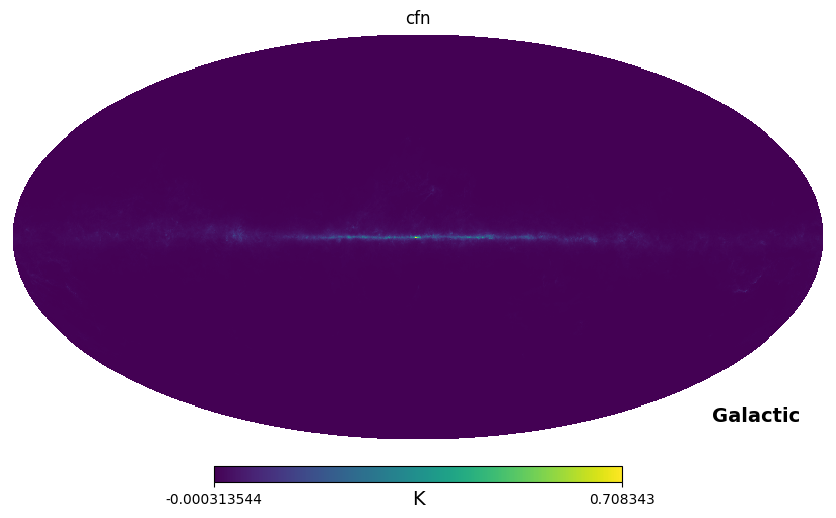

max |kappa_jl[j>=3, ell<=255]| = 0.0

=== Eq.(30) check (should be ~1) ===
ell=   0  value=1.000000e+00
ell=   1  value=1.000000e+00
ell=   2  value=1.000000e+00
ell=   5  value=1.000000e+00
ell=  10  value=1.000000e+00
ell=  20  value=1.000000e+00
ell=  32  value=1.000000e+00
ell=  64  value=1.000000e+00
ell= 128  value=1.000000e+00
ell= 256  value=1.000000e+00
ell=1024  value=1.000000e+00
min/max over ell with denom>0: 0.9999999999999994 1.0000000000000004


[DEBUG analysis] L = 1025 N = 1 lam_safe = 2.0
[DEBUG analysis] wav_jln shape: (12, 1025, 2049) dtype: complex128
[DEBUG analysis] scal_l shape: (1025,) dtype: complex128
[DEBUG analysis] S(ell)=|phi|^2+sum|psi|^2  min/max: 0.07957747154594766 25.950888160393756
[DEBUG analysis]   min at ell = 0
[DEBUG analysis]   max at ell = 1024
[DEBUG analysis] S tail (last 20 ells): [25.46961254 25.49494283 25.52027313 25.54560343 25.57093372 25.59626402
 25.62159431 25.64692461 25.67225491 25.6975852  25.7229155  25.74824579
 25.77357609 25

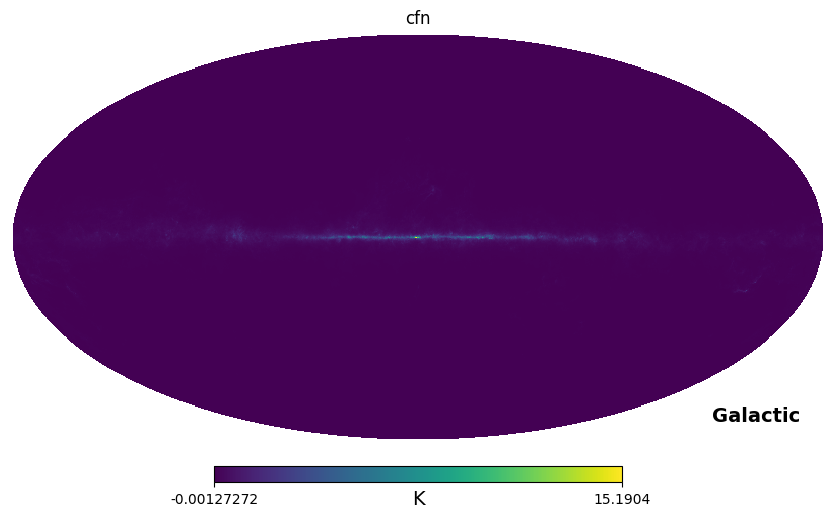

max |kappa_jl[j>=3, ell<=255]| = 0.0

=== Eq.(30) check (should be ~1) ===
ell=   0  value=1.000000e+00
ell=   1  value=1.000000e+00
ell=   2  value=1.000000e+00
ell=   5  value=1.000000e+00
ell=  10  value=1.000000e+00
ell=  20  value=1.000000e+00
ell=  32  value=1.000000e+00
ell=  64  value=1.000000e+00
ell= 128  value=1.000000e+00
ell= 256  value=1.000000e+00
ell=1024  value=1.000000e+00
min/max over ell with denom>0: 0.9999999999999994 1.0000000000000004


[DEBUG analysis] L = 1025 N = 1 lam_safe = 2.0
[DEBUG analysis] wav_jln shape: (12, 1025, 2049) dtype: complex128
[DEBUG analysis] scal_l shape: (1025,) dtype: complex128
[DEBUG analysis] S(ell)=|phi|^2+sum|psi|^2  min/max: 0.07957747154594766 25.950888160393756
[DEBUG analysis]   min at ell = 0
[DEBUG analysis]   max at ell = 1024
[DEBUG analysis] S tail (last 20 ells): [25.46961254 25.49494283 25.52027313 25.54560343 25.57093372 25.59626402
 25.62159431 25.64692461 25.67225491 25.6975852  25.7229155  25.74824579
 25.77357609 25

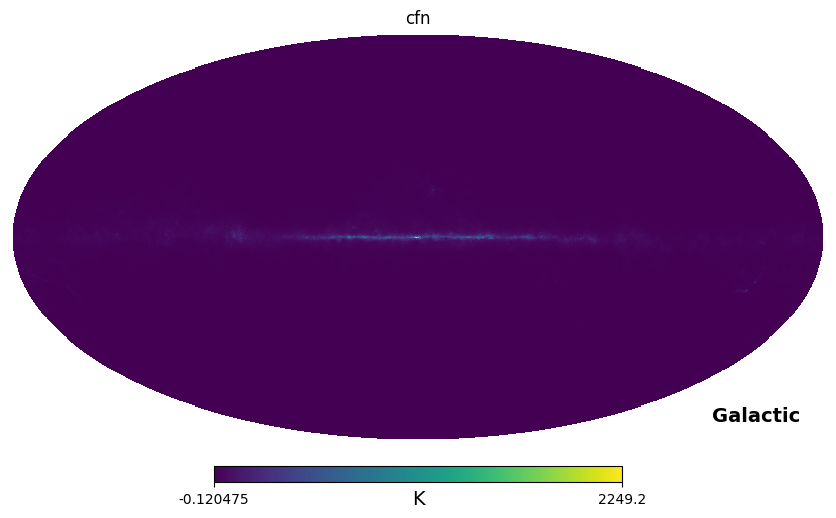

max |kappa_jl[j>=3, ell<=255]| = 0.0

=== Eq.(30) check (should be ~1) ===
ell=   0  value=1.000000e+00
ell=   1  value=1.000000e+00
ell=   2  value=1.000000e+00
ell=   5  value=1.000000e+00
ell=  10  value=1.000000e+00
ell=  20  value=1.000000e+00
ell=  32  value=1.000000e+00
ell=  64  value=1.000000e+00
ell= 128  value=1.000000e+00
ell= 256  value=1.000000e+00
ell=1024  value=1.000000e+00
min/max over ell with denom>0: 0.9999999999999994 1.0000000000000004


[DEBUG analysis] L = 1025 N = 1 lam_safe = 2.0
[DEBUG analysis] wav_jln shape: (12, 1025, 2049) dtype: complex128
[DEBUG analysis] scal_l shape: (1025,) dtype: complex128
[DEBUG analysis] S(ell)=|phi|^2+sum|psi|^2  min/max: 0.07957747154594766 25.950888160393756
[DEBUG analysis]   min at ell = 0
[DEBUG analysis]   max at ell = 1024
[DEBUG analysis] S tail (last 20 ells): [25.46961254 25.49494283 25.52027313 25.54560343 25.57093372 25.59626402
 25.62159431 25.64692461 25.67225491 25.6975852  25.7229155  25.74824579
 25.77357609 25

In [11]:
pipe.step_wavelets()

--- RUNNING ILC (new functional API) ---
Device 0: bytes_in_use=0 peak_bytes_in_use=1394009344 bytes_limit=19069206528 largest_free_chunk=n/a num_allocs=18930303
--- ILC target='cmb'  input='cfn'  lmax=1024  scales=[0, 1, 2, 3, 4, 5, 6] ---
[DEBUG] passed L_max=1025 -> L=1025 lmax=1024
[DEBUG] wavelet_js_custom(L)=[0, 1, 2, 3, 4, 5, 6]
Processing realisation 0000 for component cfn


Doubled and saved wavelet maps in 299.72 seconds
[locality] scal(ell=0..64)  FWHM=323811.000 arcmin  f_sky(paper)=8.000e+02  f_sky(eff_hp,diag)=1.000e+00  N_modes(full)=1.000e+00  N_modes(local,paper)=8.000e+02
[locality] wav(j=0, ell=32..128)  FWHM=2591.151 arcmin  f_sky(paper)=5.123e-02  f_sky(eff_hp,diag)=9.736e-02  N_modes(full)=1.562e+04  N_modes(local,paper)=8.000e+02
[locality] wav(j=1, ell=64..256)  FWHM=1300.949 arcmin  f_sky(paper)=1.291e-02  f_sky(eff_hp,diag)=2.550e-02  N_modes(full)=6.195e+04  N_modes(local,paper)=8.000e+02
[locality] wav(j=2, ell=128..512)  FWHM=651.827 arcmin  f_sky(paper)=3.242e-03  f_sky(eff_hp,diag)=6.462e-03  N_modes(full)=2.468e+05  N_modes(local,paper)=8.000e+02
[locality] wav(j=3, ell=256..705)  FWHM=492.150 arcmin  f_sky(paper)=1.848e-03  f_sky(eff_hp,diag)=3.689e-03  N_modes(full)=4.329e+05  N_modes(local,paper)=8.000e+02
[locality] wav(j=4, ell=542..916)  FWHM=437.772 arcmin  f_sky(paper)=1.462e-03  f_sky(eff_hp,diag)=2.920e-03  N_modes(full)=5

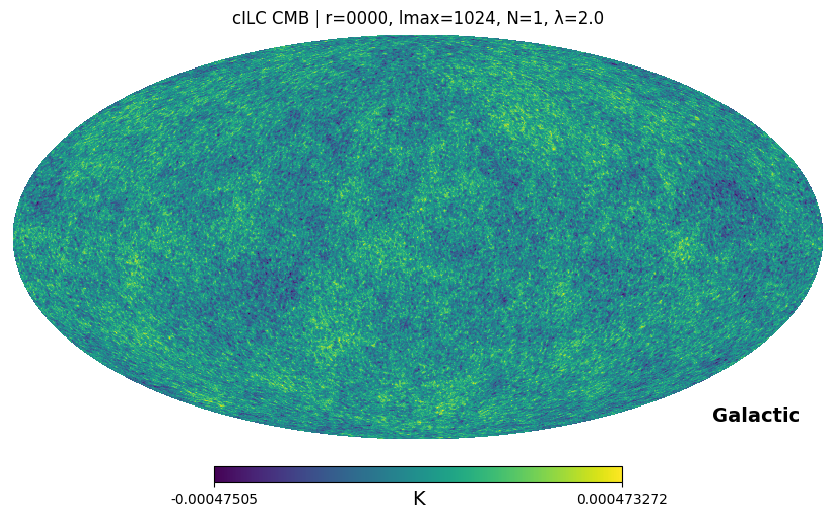

In [12]:
pipe.F_source = "theory"  # "empirical" or "theory"
pipe.F_kwargs = {
    "base_dir": os.path.join(pipe.directory, "CMB_realisations"),
    "frequencies": pipe.frequencies,
    "realization": pipe.start_realisation,  
    "normalize": True,
    "mask_path": "",
    "file_templates": {
        "cmb": "cmb_r{realisation:04d}.fits",
        "sync": "sync_f{frequency}.fits", 
        "tsz":  "tsz_f{frequency}.fits",
    },
}
pipe.step_ilc()

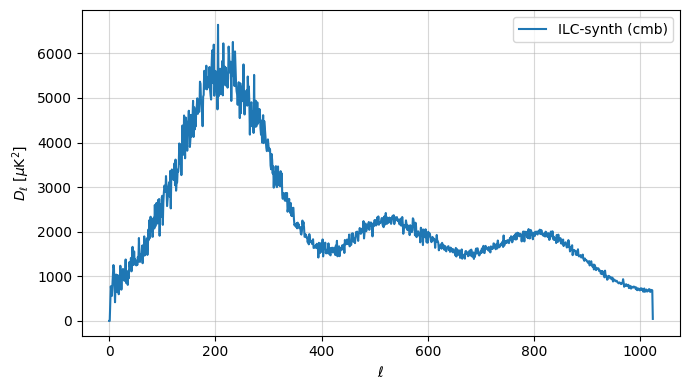

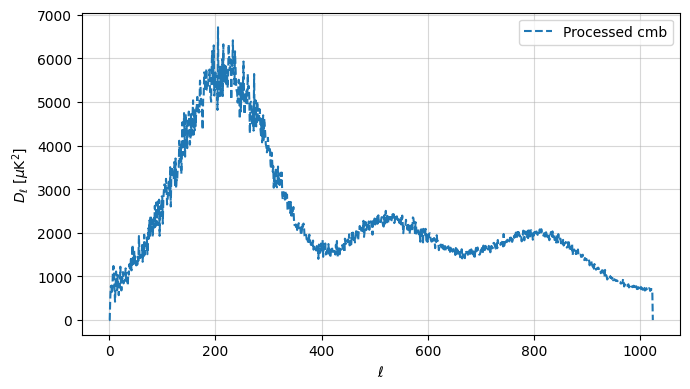

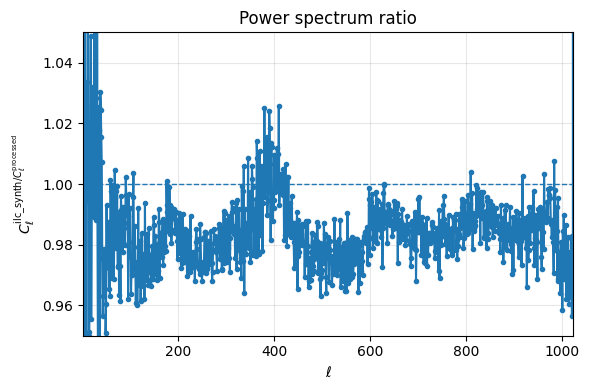

In [8]:
# --- same call used ---
ell_ilc, cl_ilc = pipe.step_power_spec(
    unit="K",
    source="ilc_synth",
    component="cfn",
    extract_comp="cmb",
    frequencies=["030","044","070","100","143","217","353","545","857"],
    realisation=0,
    lmax=1024,
    lam=2.0,
)

# --- call the 'processed' one with identical args ---
ell_proc, cl_proc = pipe.step_power_spec(
    unit="K",
    source="processed",
    component="cmb",
    extract_comp=None,
    frequencies=None,          # processed_cmb has no freq in filename
    realisation=0,
    lmax=1024,
    lam=2.0,
)

# --- ratio (processed over ilc_synth) ---
import numpy as np
import matplotlib.pyplot as plt

# (optional but helpful) ensure ℓ match
assert np.array_equal(ell_ilc, ell_proc), "ℓ grids differ"
ell = ell_ilc
ratio = cl_ilc / cl_proc 

# --- plot ---
plt.figure(figsize=(6,4))
plt.plot(ell, ratio, marker='.', linestyle='-')
plt.axhline(1.0, linestyle='--', linewidth=1)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell^{\mathrm{ilc\_synth}/C_\ell^{\mathrm{processed}}}$')
plt.ylim(0.95,1.05)
plt.xlim(2,1024)
plt.title('Power spectrum ratio')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

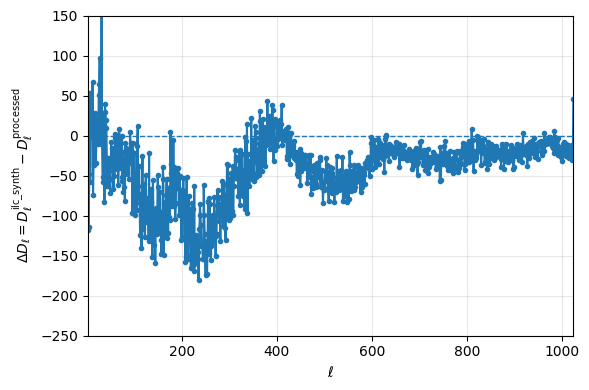

In [9]:
import numpy as np
import matplotlib.pyplot as plt

assert np.array_equal(ell_ilc, ell_proc)
ell = ell_ilc.astype(float)

Dl_ilc  = ell*(ell+1.0)/(2.0*np.pi) * cl_ilc
Dl_proc = ell*(ell+1.0)/(2.0*np.pi) * cl_proc

res_Dl = Dl_ilc - Dl_proc

plt.figure(figsize=(6,4))
plt.plot(ell, res_Dl*1e12, marker='.', linestyle='-')
plt.axhline(0.0, linestyle='--', linewidth=1)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\Delta D_\ell = D_\ell^{\rm ilc\_synth}-D_\ell^{\rm processed}$')
plt.xlim(2, 1024)
plt.ylim(-250, 150)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [14]:
from s2wav import samples

L=256; N=1; lam=2.0
J = samples.j_max(L, lam)
print("J =", J)

for j in range(0, J+1):
    Lj, Nj, L0j = samples.LN_j(L, j=j, N=N, lam=lam, multiresolution=True)
    print(f"j={j}: Lj={Lj}, Nj={Nj}, L0j={L0j}")

J = 2
j=0: Lj=128, Nj=1, L0j=32
j=1: Lj=256, Nj=1, L0j=64
j=2: Lj=256, Nj=1, L0j=128


In [15]:
import os
os.environ["JAX_ENABLE_X64"] = "1"

import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import s2fft


def mw_map_to_Cl(mw_map: jnp.ndarray, L: int) -> np.ndarray:
    """
    C_ell = (1/(2ell+1)) * sum_{m=-ell..ell} |a_{ell m}|^2
    Assumes MW m-indexing: m = -(L-1)..(L-1) with m=0 at index (L-1).
    """
    L = int(L)
    flm = np.asarray(s2fft.forward(mw_map, L=L))  # shape (L, 2L-1)
    mid = L - 1

    Cl = np.zeros(L, dtype=np.float64)
    for ell in range(L):
        alm = flm[ell, mid - ell : mid + ell + 1]   # m=-ell..ell
        Cl[ell] = np.sum(np.abs(alm) ** 2) / (2 * ell + 1)

    return Cl

# ----------------------------
# Toy model: all ones
# ----------------------------
L = 543
N_directions = 1
lam = 2.0

key = jax.random.PRNGKey(0)
mw_map = jax.random.normal(key, (L, 2*L - 1), dtype=jnp.float64)

#mw_map = jnp.ones((L, 2*L - 1), dtype=jnp.float64)

# ---- forward transform ----
coeffs_list, scal_tiled = MWTools.wavelet_transform_from_map(
    mw_map=mw_map,
    L=L,
    N_directions=N_directions,
    lam=lam,
)

print("number of blocks (including scaling):", len(coeffs_list))
for i, blk in enumerate(coeffs_list):
    print(f"block[{i:02d}] shape:", np.asarray(blk).shape)

# ---- inverse transform ----
mw_rec = MWTools.inverse_wavelet_transform(
    wavelet_coeffs=coeffs_list,
    L=L,
    lam=lam,
    N_directions=N_directions,
)

# s2wav.synthesis may return complex; for a real signal the imag part is numerical noise
mw_rec_real = jnp.real(mw_rec)

# ----------------------------
# Power spectra
# ----------------------------
Cl_in  = mw_map_to_Cl(mw_map, L)
Cl_rec = mw_map_to_Cl(mw_rec_real, L)

ells = np.arange(L)

plt.figure()
plt.semilogy(ells[1:], Cl_in[1:],  label="input")
plt.semilogy(ells[1:], Cl_rec[1:], label="reconstructed")
plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell$")
plt.title("Power spectrum: input vs reconstructed")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Ratio plot (after / before)
plt.figure()
ratio = np.where(Cl_in > 0, Cl_rec / Cl_in, np.nan)
plt.plot(ells[1:], ratio[1:])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell^{rec} / C_\ell^{in}$")
plt.ylim(0.99, 1.01)
plt.title("Power spectrum ratio")
plt.grid(True, alpha=0.3)
plt.show()

max |kappa_jl[j>=3, ell<=255]| = 0.0

=== Eq.(30) check (should be ~1) ===
ell=   0  value=1.000000e+00
ell=   1  value=1.000000e+00
ell=   2  value=1.000000e+00
ell=   5  value=1.000000e+00
ell=  10  value=1.000000e+00
ell=  20  value=1.000000e+00
ell=  32  value=1.000000e+00
ell=  64  value=1.000000e+00
ell= 128  value=1.000000e+00
ell= 256  value=1.000000e+00
ell= 542  value=1.000000e+00
min/max over ell with denom>0: 0.9999999999999994 1.0000000000000004


[DEBUG analysis] L = 543 N = 1 lam_safe = 2.0
[DEBUG analysis] wav_jln shape: (12, 543, 1085) dtype: complex128
[DEBUG analysis] scal_l shape: (543,) dtype: complex128
[DEBUG analysis] S(ell)=|phi|^2+sum|psi|^2  min/max: 0.07957747154594766 13.74168553149206
[DEBUG analysis]   min at ell = 0
[DEBUG analysis]   max at ell = 542
[DEBUG analysis] S tail (last 20 ells): [13.26040991 13.28574021 13.3110705  13.3364008  13.36173109 13.38706139
 13.41239168 13.43772198 13.46305228 13.48838257 13.51371287 13.53904316
 13.56437346 13.5897

KeyboardInterrupt: 


CONFIG
lmax = 255
L (bandlimit) = 256  (modes ell=0..L-1)
MW map shape should be (L, 2L-1) = (256, 511)
lam = 2.0 N_directions = 1

INPUT MAP
mw_map dtype: float64
mw_map shape: (256, 511)
mw_map mean/std: -0.008401381240646743 1.0009247847868221

CUSTOM WAVELET BAND SELECTION (if applicable)
wavelet_js_custom(L) = [0, 1, 2]
n_wavelet_scales = 3
expected total blocks (scal + wavelets) = 4

WAVELET ANALYSIS (forward transform)

=== Eq.(30) check (should be ~1) ===
ell=   0  value=1.000000e+00
ell=   1  value=1.000000e+00
ell=   2  value=1.000000e+00
ell=   5  value=1.000000e+00
ell=  10  value=1.000000e+00
ell=  20  value=1.000000e+00
ell=  32  value=1.000000e+00
ell=  64  value=1.000000e+00
ell= 128  value=1.000000e+00
ell= 255  value=1.000000e+00
ell= 255  value=1.000000e+00
min/max over ell with denom>0: 0.9999999999999997 1.0000000000000004


[DEBUG analysis] L = 256 N = 1 lam_safe = 2.0
[DEBUG analysis] wav_jln shape: (12, 256, 511) dtype: complex128
[DEBUG analysis] scal_l shape:

mw_rec dtype: float64
mw_rec shape: (256, 511)
max |Im(mw_rec)|: 0.0

HARMONIC TRANSFORM SHAPES (s2fft.forward)
flm_in shape: (256, 511)  expected: (256, 511)
flm_rec shape: (256, 511)  expected: (256, 511)

MAP-SPACE RECONSTRUCTION ERROR
max abs error: 3.99570552651157
rms error: 0.7085727590528825
relative max error: 0.8403558556702979

POWER SPECTRUM CHECK
ratio stats (ell>=1):
  min: 0.9999995085625147
  max: 1.0000000000004448
  mean: 0.9999999979636307
no ell where |ratio-1|>0.001


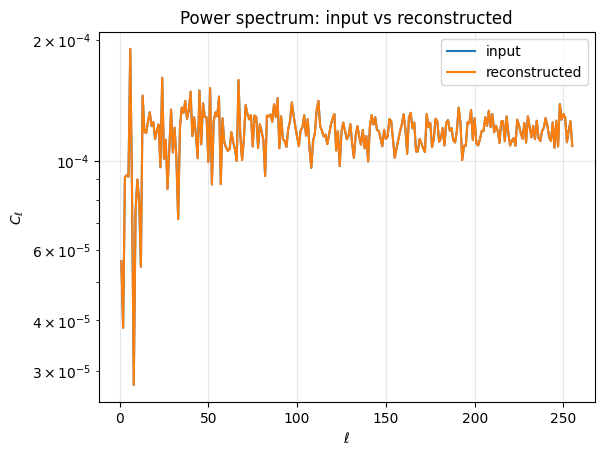

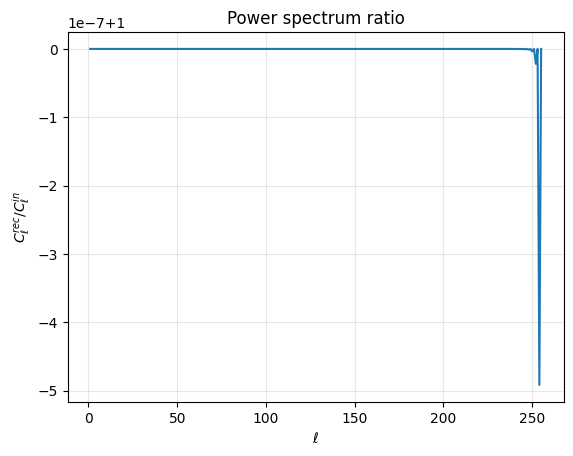

In [ ]:
from skyclean.silc.map_tools import MWTools
from skyclean.silc.ilc import SILCTools  # for wavelet_js_custom if you put it there


def mw_map_to_Cl(mw_map: jnp.ndarray, L: int) -> np.ndarray:
    """Compute C_ell from MW map via s2fft.forward."""
    L = int(L)
    flm = np.asarray(s2fft.forward(mw_map, L=L))  # expect (L, 2L-1)
    mid = L - 1

    Cl = np.zeros(L, dtype=np.float64)
    for ell in range(L):
        alm = flm[ell, mid - ell : mid + ell + 1]  # m=-ell..ell
        Cl[ell] = np.sum(np.abs(alm) ** 2) / (2 * ell + 1)
    return Cl


def print_header(title: str):
    print("\n" + "=" * 80)
    print(title)
    print("=" * 80)


# ----------------------------
# CONFIG: choose lmax and bandlimit
# ----------------------------
lmax = 255
L = lmax + 1           # bandlimit
lam = 2.0
N_directions = 1

print_header("CONFIG")
print("lmax =", lmax)
print("L (bandlimit) =", L, " (modes ell=0..L-1)")
print("MW map shape should be (L, 2L-1) =", (L, 2 * L - 1))
print("lam =", lam, "N_directions =", N_directions)

# ----------------------------
# generate a random MW map
# ----------------------------
key = jax.random.PRNGKey(0)
mw_map = jax.random.normal(key, (L, 2 * L - 1), dtype=jnp.float64)

print_header("INPUT MAP")
print("mw_map dtype:", mw_map.dtype)
print("mw_map shape:", tuple(mw_map.shape))
print("mw_map mean/std:", float(jnp.mean(mw_map)), float(jnp.std(mw_map)))

# ----------------------------
# report chosen SILC wavelet bands (if you use custom js logic)
# ----------------------------
print_header("CUSTOM WAVELET BAND SELECTION (if applicable)")
try:
    js = SILCTools.wavelet_js_custom(L)  # your custom selector
    print("wavelet_js_custom(L) =", js)
    print("n_wavelet_scales =", len(js))
    print("expected total blocks (scal + wavelets) =", 1 + len(js))
except Exception as e:
    print("Could not call SILCTools.wavelet_js_custom(L). Error:")
    print(repr(e))
    js = None

# ----------------------------
# forward wavelet transform
# ----------------------------
print_header("WAVELET ANALYSIS (forward transform)")
coeffs_list, scal_tiled = MWTools.wavelet_transform_from_map(
    mw_map=mw_map,
    L=L,
    N_directions=N_directions,
    lam=lam,
)

print("Returned coeffs_list length (incl scaling) =", len(coeffs_list))
for i, blk in enumerate(coeffs_list):
    arr = np.asarray(blk)
    print(f"  block[{i:02d}] shape={arr.shape}  dtype={arr.dtype}")

print("scal_tiled type:", type(scal_tiled))
try:
    print("scal_tiled shape:", np.asarray(scal_tiled).shape)
except Exception:
    pass

# ----------------------------
# inverse wavelet transform
# ----------------------------
print_header("WAVELET SYNTHESIS (inverse transform)")
mw_rec = MWTools.inverse_wavelet_transform(
    wavelet_coeffs=coeffs_list,
    L=L,
    lam=lam,
    N_directions=N_directions,
)
mw_rec_real = jnp.real(mw_rec)

print("mw_rec dtype:", mw_rec.dtype)
print("mw_rec shape:", tuple(mw_rec.shape))
print("max |Im(mw_rec)|:", float(jnp.max(jnp.abs(jnp.imag(mw_rec)))))

# ----------------------------
# harmonic-space shape sanity check
# ----------------------------
print_header("HARMONIC TRANSFORM SHAPES (s2fft.forward)")
flm_in = np.asarray(s2fft.forward(mw_map, L=L))
flm_rec = np.asarray(s2fft.forward(mw_rec_real, L=L))
print("flm_in shape:", flm_in.shape, " expected:", (L, 2 * L - 1))
print("flm_rec shape:", flm_rec.shape, " expected:", (L, 2 * L - 1))

# ----------------------------
# map-space reconstruction error
# ----------------------------
print_header("MAP-SPACE RECONSTRUCTION ERROR")
diff = mw_rec_real - mw_map
max_abs = float(jnp.max(jnp.abs(diff)))
rms = float(jnp.sqrt(jnp.mean(diff ** 2)))
rel_max = max_abs / float(jnp.max(jnp.abs(mw_map)))
print("max abs error:", max_abs)
print("rms error:", rms)
print("relative max error:", rel_max)

# ----------------------------
# power spectra and ratio
# ----------------------------
print_header("POWER SPECTRUM CHECK")
Cl_in = mw_map_to_Cl(mw_map, L)
Cl_rec = mw_map_to_Cl(mw_rec_real, L)

ratio = np.where(Cl_in > 0, Cl_rec / Cl_in, np.nan)

# Print a few summary stats
finite = np.isfinite(ratio[1:])
print("ratio stats (ell>=1):")
print("  min:", float(np.nanmin(ratio[1:])))
print("  max:", float(np.nanmax(ratio[1:])))
print("  mean:", float(np.nanmean(ratio[1:])))

# Find where it first deviates noticeably
thr = 1e-3
bad = np.where(np.abs(ratio - 1.0) > thr)[0]
if bad.size > 0:
    print(f"first ell where |ratio-1|>{thr}:", int(bad[0]), "ratio=", float(ratio[bad[0]]))
else:
    print(f"no ell where |ratio-1|>{thr}")

# ----------------------------
# plots
# ----------------------------
ells = np.arange(L)

plt.figure()
plt.semilogy(ells[1:], Cl_in[1:], label="input")
plt.semilogy(ells[1:], Cl_rec[1:], label="reconstructed")
plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell$")
plt.title("Power spectrum: input vs reconstructed")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

plt.figure()
plt.plot(ells[1:], ratio[1:])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell^{rec} / C_\ell^{in}$")
plt.title("Power spectrum ratio")
plt.grid(True, alpha=0.3)
plt.show()


CONFIG
lmax = 542
L (bandlimit) = 543  (modes ell=0..L-1)
MW map shape should be (L, 2L-1) = (543, 1085)
lam = 2.0 N_directions = 1

INPUT MAP
mw_map dtype: float64
mw_map shape: (543, 1085)
mw_map mean/std: -0.002224869566712078 1.0003627964303092

CUSTOM WAVELET BAND SELECTION (if applicable)
wavelet_js_custom(L) = [0, 1, 2, 3, 4]
n_wavelet_scales = 5
expected total blocks (scal + wavelets) = 6

WAVELET ANALYSIS (forward transform)

=== Eq.(30) check (should be ~1) ===
ell=   0  value=1.000000e+00
ell=   1  value=1.000000e+00
ell=   2  value=1.000000e+00
ell=   5  value=1.000000e+00
ell=  10  value=1.000000e+00
ell=  20  value=1.000000e+00
ell=  32  value=1.000000e+00
ell=  64  value=1.000000e+00
ell= 128  value=1.000000e+00
ell= 256  value=1.000000e+00
ell= 542  value=1.000000e+00
min/max over ell with denom>0: 0.9999999999999994 1.0000000000000004


[DEBUG analysis] L = 543 N = 1 lam_safe = 2.0
[DEBUG analysis] wav_jln shape: (12, 543, 1085) dtype: complex128
[DEBUG analysis] scal

flm_in shape: (543, 1085)  expected: (543, 1085)
flm_rec shape: (543, 1085)  expected: (543, 1085)

MAP-SPACE RECONSTRUCTION ERROR
max abs error: 4.152601339035369
rms error: 0.7071013809464627
relative max error: 0.8377003226163128

POWER SPECTRUM CHECK
ratio stats (ell>=1):
  min: 0.9999995932829436
  max: 1.0000000000033502
  mean: 0.9999999992043719
no ell where |ratio-1|>0.001


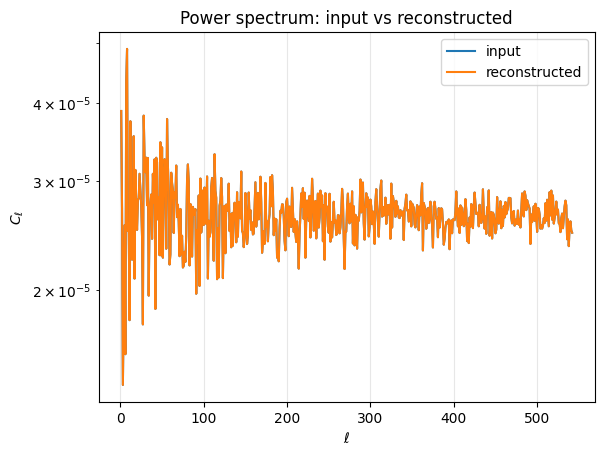

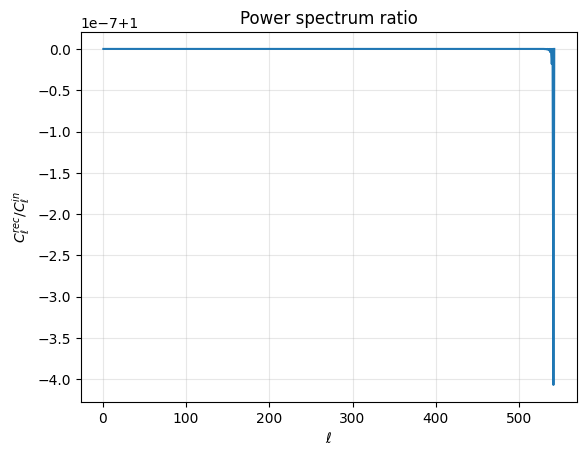

In [ ]:
from skyclean.silc.map_tools import MWTools
from skyclean.silc.ilc import SILCTools  # for wavelet_js_custom if you put it there


def mw_map_to_Cl(mw_map: jnp.ndarray, L: int) -> np.ndarray:
    """Compute C_ell from MW map via s2fft.forward."""
    L = int(L)
    flm = np.asarray(s2fft.forward(mw_map, L=L))  # expect (L, 2L-1)
    mid = L - 1

    Cl = np.zeros(L, dtype=np.float64)
    for ell in range(L):
        alm = flm[ell, mid - ell : mid + ell + 1]  # m=-ell..ell
        Cl[ell] = np.sum(np.abs(alm) ** 2) / (2 * ell + 1)
    return Cl


def print_header(title: str):
    print("\n" + "=" * 80)
    print(title)
    print("=" * 80)


# ----------------------------
# CONFIG: choose lmax and bandlimit
# ----------------------------
lmax = 542
L = lmax + 1           # bandlimit
lam = 2.0
N_directions = 1

print_header("CONFIG")
print("lmax =", lmax)
print("L (bandlimit) =", L, " (modes ell=0..L-1)")
print("MW map shape should be (L, 2L-1) =", (L, 2 * L - 1))
print("lam =", lam, "N_directions =", N_directions)

# ----------------------------
# generate a random MW map
# ----------------------------
key = jax.random.PRNGKey(0)
mw_map = jax.random.normal(key, (L, 2 * L - 1), dtype=jnp.float64)

print_header("INPUT MAP")
print("mw_map dtype:", mw_map.dtype)
print("mw_map shape:", tuple(mw_map.shape))
print("mw_map mean/std:", float(jnp.mean(mw_map)), float(jnp.std(mw_map)))

# ----------------------------
# report chosen SILC wavelet bands (if you use custom js logic)
# ----------------------------
print_header("CUSTOM WAVELET BAND SELECTION (if applicable)")
try:
    js = SILCTools.wavelet_js_custom(L)  # your custom selector
    print("wavelet_js_custom(L) =", js)
    print("n_wavelet_scales =", len(js))
    print("expected total blocks (scal + wavelets) =", 1 + len(js))
except Exception as e:
    print("Could not call SILCTools.wavelet_js_custom(L). Error:")
    print(repr(e))
    js = None

# ----------------------------
# forward wavelet transform
# ----------------------------
print_header("WAVELET ANALYSIS (forward transform)")
coeffs_list, scal_tiled = MWTools.wavelet_transform_from_map(
    mw_map=mw_map,
    L=L,
    N_directions=N_directions,
    lam=lam,
)

print("Returned coeffs_list length (incl scaling) =", len(coeffs_list))
for i, blk in enumerate(coeffs_list):
    arr = np.asarray(blk)
    print(f"  block[{i:02d}] shape={arr.shape}  dtype={arr.dtype}")

print("scal_tiled type:", type(scal_tiled))
try:
    print("scal_tiled shape:", np.asarray(scal_tiled).shape)
except Exception:
    pass

# ----------------------------
# inverse wavelet transform
# ----------------------------
print_header("WAVELET SYNTHESIS (inverse transform)")
mw_rec = MWTools.inverse_wavelet_transform(
    wavelet_coeffs=coeffs_list,
    L=L,
    lam=lam,
    N_directions=N_directions,
)
mw_rec_real = jnp.real(mw_rec)

print("mw_rec dtype:", mw_rec.dtype)
print("mw_rec shape:", tuple(mw_rec.shape))
print("max |Im(mw_rec)|:", float(jnp.max(jnp.abs(jnp.imag(mw_rec)))))

# ----------------------------
# harmonic-space shape sanity check
# ----------------------------
print_header("HARMONIC TRANSFORM SHAPES (s2fft.forward)")
flm_in = np.asarray(s2fft.forward(mw_map, L=L))
flm_rec = np.asarray(s2fft.forward(mw_rec_real, L=L))
print("flm_in shape:", flm_in.shape, " expected:", (L, 2 * L - 1))
print("flm_rec shape:", flm_rec.shape, " expected:", (L, 2 * L - 1))

# ----------------------------
# map-space reconstruction error
# ----------------------------
print_header("MAP-SPACE RECONSTRUCTION ERROR")
diff = mw_rec_real - mw_map
max_abs = float(jnp.max(jnp.abs(diff)))
rms = float(jnp.sqrt(jnp.mean(diff ** 2)))
rel_max = max_abs / float(jnp.max(jnp.abs(mw_map)))
print("max abs error:", max_abs)
print("rms error:", rms)
print("relative max error:", rel_max)

# ----------------------------
# power spectra and ratio
# ----------------------------
print_header("POWER SPECTRUM CHECK")
Cl_in = mw_map_to_Cl(mw_map, L)
Cl_rec = mw_map_to_Cl(mw_rec_real, L)

ratio = np.where(Cl_in > 0, Cl_rec / Cl_in, np.nan)

# Print a few summary stats
finite = np.isfinite(ratio[1:])
print("ratio stats (ell>=1):")
print("  min:", float(np.nanmin(ratio[1:])))
print("  max:", float(np.nanmax(ratio[1:])))
print("  mean:", float(np.nanmean(ratio[1:])))

# Find where it first deviates noticeably
thr = 1e-3
bad = np.where(np.abs(ratio - 1.0) > thr)[0]
if bad.size > 0:
    print(f"first ell where |ratio-1|>{thr}:", int(bad[0]), "ratio=", float(ratio[bad[0]]))
else:
    print(f"no ell where |ratio-1|>{thr}")

# ----------------------------
# plots
# ----------------------------
ells = np.arange(L)

plt.figure()
plt.semilogy(ells[1:], Cl_in[1:], label="input")
plt.semilogy(ells[1:], Cl_rec[1:], label="reconstructed")
plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell$")
plt.title("Power spectrum: input vs reconstructed")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

plt.figure()
plt.plot(ells[1:], ratio[1:])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell^{rec} / C_\ell^{in}$")
plt.title("Power spectrum ratio")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
mid = L - 1
# relative error in alm
num = np.linalg.norm(flm_rec - flm_in)
den = np.linalg.norm(flm_in)
print("||a_rec - a_in|| / ||a_in|| =", num / den)

# check if it's mostly a phase flip: compare |alm|
abs_num = np.linalg.norm(np.abs(flm_rec) - np.abs(flm_in))
abs_den = np.linalg.norm(np.abs(flm_in))
print("|| |a_rec| - |a_in| || / || |a_in| || =", abs_num / abs_den)
def rel_err(a, b):
    return float(np.linalg.norm(np.asarray(a-b)) / np.linalg.norm(np.asarray(a)))

A = np.asarray(mw_map)
B = np.asarray(mw_rec_real)

print("direct:", rel_err(B, A))
print("flip m:", rel_err(B, A[:, ::-1]))
print("flip theta:", rel_err(B, A[::-1, :]))
print("flip both:", rel_err(B, A[::-1, ::-1]))
print("transpose:", rel_err(B, A.T) if B.shape == A.T.shape else "n/a")


||a_rec - a_in|| / ||a_in|| = 3.8742938884024464e-05
|| |a_rec| - |a_in| || / || |a_in| || = 2.7002345616022956e-05
direct: 0.9985778427397162
flip m: 1.7269833165985182
flip theta: 1.7267863429159422
flip both: 1.731183757708804
transpose: n/a


In [ ]:
A = np.asarray(mw_map)
B = np.asarray(mw_rec_real)

print("normA, normB:", np.linalg.norm(A), np.linalg.norm(B))
print("corr(A,B):", np.vdot(A.ravel(), B.ravel()).real / (np.linalg.norm(A)*np.linalg.norm(B)))

# best per-theta (row) scaling alpha[theta] such that B[theta,:] ≈ alpha[theta]*A[theta,:]
num = np.sum(A * B, axis=1)
den = np.sum(A * A, axis=1) + 1e-30
alpha = num / den

print("alpha range:", alpha.min(), alpha.max())
print("alpha std/mean:", alpha.std() / (np.mean(alpha) + 1e-30))

# check how well this explains the mismatch
B_fit = alpha[:, None] * A
rel = np.linalg.norm(B - B_fit) / np.linalg.norm(B)
print("relative residual after per-theta scaling:", rel)


normA, normB: 767.8446981979068 543.5187665511347
corr(A,B): 0.7073704346784263
alpha range: 0.0005708415320360428 0.8136616172126541
alpha std/mean: 0.48417139925559766
relative residual after per-theta scaling: 0.6179482358128936


In [ ]:
A = np.asarray(mw_map)
flm = s2fft.forward(A, L=L)
A_rt = np.asarray(s2fft.inverse(flm, L=L))
print("s2fft roundtrip rel err:", np.linalg.norm(A_rt - A) / np.linalg.norm(A))
B = np.asarray(mw_rec_real)
flmB = s2fft.forward(B, L=L)
B_rt = np.asarray(s2fft.inverse(flmB, L=L))
print("s2fft roundtrip rel err (B):", np.linalg.norm(B_rt - B) / np.linalg.norm(B))

s2fft roundtrip rel err: 0.7068431946308303


s2fft roundtrip rel err (B): 4.2862174035578755e-12



CONFIG
lmax = 542 L = 543 shape = (543, 1085)
lam = 2.0 N_directions = 1



S2FFT roundtrip (input map): 8.098953676491092e-12

wavelet_js_custom(L) = [0, 1, 2, 3, 4] -> n_wavelets = 5 total blocks = 6

=== Eq.(30) check (should be ~1) ===
ell=   0  value=1.000000e+00
ell=   1  value=1.000000e+00
ell=   2  value=1.000000e+00
ell=   5  value=1.000000e+00
ell=  10  value=1.000000e+00
ell=  20  value=1.000000e+00
ell=  32  value=1.000000e+00
ell=  64  value=1.000000e+00
ell= 128  value=1.000000e+00
ell= 256  value=1.000000e+00
ell= 542  value=1.000000e+00
min/max over ell with denom>0: 0.9999999999999994 1.0000000000000004


[DEBUG analysis] L = 543 N = 1 lam_safe = 2.0
[DEBUG analysis] wav_jln shape: (12, 543, 1085) dtype: complex128
[DEBUG analysis] scal_l shape: (543,) dtype: complex128
[DEBUG analysis] S(ell)=|phi|^2+sum|psi|^2  min/max: 0.07957747154594766 13.74168553149206
[DEBUG analysis]   min at ell = 0
[DEBUG analysis]   max at ell = 542
[DEBUG analysis] S tail (last 20 ells): [13.26040991 13.28574021 13.3110705  13.3364008  13.36173109 13.38706139
 13

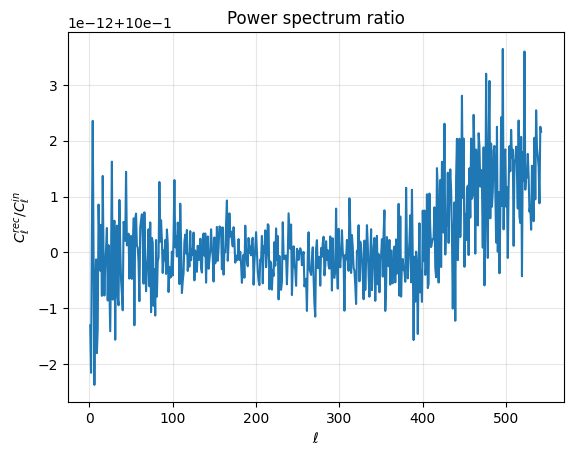

In [ ]:
import os
os.environ["JAX_ENABLE_X64"] = "1"

import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import s2fft

from skyclean.silc.map_tools import MWTools
from skyclean.silc.ilc import SILCTools

def mw_map_to_Cl(mw_map: np.ndarray, L: int) -> np.ndarray:
    L = int(L)
    flm = np.asarray(s2fft.forward(mw_map, L=L))
    mid = L - 1
    Cl = np.zeros(L, dtype=np.float64)
    for ell in range(L):
        alm = flm[ell, mid - ell : mid + ell + 1]
        Cl[ell] = np.sum(np.abs(alm) ** 2) / (2 * ell + 1)
    return Cl

def rel_err(a, b):
    return float(np.linalg.norm(a-b) / np.linalg.norm(b))

# ----------------------------
# CONFIG
# ----------------------------
lmax = 542
L = lmax + 1
lam = 2.0
N_directions = 1

print("\nCONFIG")
print("lmax =", lmax, "L =", L, "shape =", (L, 2*L-1))
print("lam =", lam, "N_directions =", N_directions)

# ----------------------------
# Make a *bandlimited* random map by sampling random alm then inverse SHT
# ----------------------------
key = jax.random.PRNGKey(0)
# random complex flm on MW harmonic grid (L, 2L-1)
flm_r = jax.random.normal(key, (L, 2*L-1), dtype=jnp.float64)
flm_i = jax.random.normal(jax.random.split(key)[1], (L, 2*L-1), dtype=jnp.float64)
flm = np.asarray(flm_r + 1j*flm_i)

mw_map = np.asarray(s2fft.inverse(flm, L=L)).real  # real bandlimited map

# sanity: s2fft roundtrip should be ~ machine precision
mw_rt = np.asarray(s2fft.inverse(s2fft.forward(mw_map, L=L), L=L)).real
print("\nS2FFT roundtrip (input map):", rel_err(mw_rt, mw_map))

# ----------------------------
# wavelet band selection
# ----------------------------
js = SILCTools.wavelet_js_custom(L)
print("\nwavelet_js_custom(L) =", js, "-> n_wavelets =", len(js), "total blocks =", 1+len(js))

# ----------------------------
# Forward wavelet transform
# ----------------------------
coeffs_list, scal_tiled = MWTools.wavelet_transform_from_map(
    mw_map=jnp.asarray(mw_map),
    L=L,
    N_directions=N_directions,
    lam=lam,
)

print("\nANALYSIS blocks:")
print("len(coeffs_list) =", len(coeffs_list))
for i, blk in enumerate(coeffs_list):
    arr = np.asarray(blk)
    print(f"  block[{i:02d}] shape={arr.shape} dtype={arr.dtype}")

# ----------------------------
# Inverse wavelet transform
# ----------------------------
mw_rec = MWTools.inverse_wavelet_transform(
    wavelet_coeffs=coeffs_list,
    L=L,
    lam=lam,
    N_directions=N_directions,
)
mw_rec = np.asarray(jnp.real(mw_rec))

# sanity: s2fft roundtrip should also be tiny
mw_rec_rt = np.asarray(s2fft.inverse(s2fft.forward(mw_rec, L=L), L=L)).real
print("\nS2FFT roundtrip (reconstructed map):", rel_err(mw_rec_rt, mw_rec))

# ----------------------------
# Map-space + alm-space errors
# ----------------------------
flm_in  = np.asarray(s2fft.forward(mw_map, L=L))
flm_rec = np.asarray(s2fft.forward(mw_rec, L=L))

print("\nERRORS")
print("map rel err:", rel_err(mw_rec, mw_map))
print("alm rel err:", np.linalg.norm(flm_rec - flm_in) / np.linalg.norm(flm_in))
print("|alm| rel err:", np.linalg.norm(np.abs(flm_rec) - np.abs(flm_in)) / np.linalg.norm(np.abs(flm_in)))

# ----------------------------
# Power spectra
# ----------------------------
Cl_in  = mw_map_to_Cl(mw_map, L)
Cl_rec = mw_map_to_Cl(mw_rec, L)
ratio = np.where(Cl_in > 0, Cl_rec/Cl_in, np.nan)

print("\nCl ratio stats (ell>=1): min/max/mean =",
      float(np.nanmin(ratio[1:])), float(np.nanmax(ratio[1:])), float(np.nanmean(ratio[1:])))

ells = np.arange(L)

plt.figure()
plt.plot(ells[1:], ratio[1:])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell^{rec}/C_\ell^{in}$")
plt.grid(True, alpha=0.3)
plt.title("Power spectrum ratio")
plt.show()
